In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

import vrpSolver

## Use `geoJSON` to create road network

In this notebook, we are going to use local `geoJSON` file to 
- Create road network
- Display road network
- Randomly sample customers locations on road network/residential area

### 0. Preparation

To use `geoJSON` functions, we need to download the `geoJSON` files. Typically, we can get`geoJSON` file from OpenStreetMap website.
Ref: https://wiki.openstreetmap.org/wiki/Downloading_data

In this demo, we are using a `geoJSON` file of Buffalo, NY, U.S. (Jan. 20, 2022)

In [2]:
cityName = 'Buffalo'

In [3]:
geoJSONPath = "../data/%s.geojson" % cityName

### 1. Read highways fron `geoJSON` file
catergorize by motorway, country level roads, residential streets

In [13]:
network = vrpSolver.createRoadNetworkFromGeoJSON(
    geoJSONPath = geoJSONPath,
    boundaryLatLon = [
        [42.84, -78.9], 
        [42.95, -78.9], 
        [42.95, -78.8],
        [42.84, -78.8],
        [42.84, -78.9]])

In [14]:
vrpSolver

{'boundary': [(42.789, -79.061995),
  (43.079999, -79.061995),
  (43.079999, -78.436003),
  (42.789, -78.436003)],
 'road': {0: {'shape': [[42.954148, -78.766342],
    [42.953553, -78.766229],
    [42.952289, -78.766138],
    [42.95187, -78.76609],
    [42.95153, -78.765996],
    [42.951251, -78.765859],
    [42.95096, -78.765667]],
   'maxspeed': '55 mph',
   'oneway': 'yes',
   'class': 'motorway'},
  1: {'shape': [[43.001217, -78.941838], [43.000929, -78.941357]],
   'name': 'South Grand Island Bridge',
   'maxspeed': '55 mph',
   'oneway': 'yes',
   'class': 'motorway'},
  2: {'shape': [[42.988875, -78.917802],
    [42.988592, -78.917378],
    [42.988381, -78.917062],
    [42.988231, -78.916872],
    [42.988035, -78.916619],
    [42.987852, -78.916367],
    [42.98765, -78.91604],
    [42.987464, -78.915702]],
   'oneway': 'yes',
   'class': 'motorway'},
  3: {'shape': [[42.988086, -78.911572],
    [42.989189, -78.909919],
    [42.989578, -78.909236],
    [42.98982, -78.908769],
   

### 2. Randomly (uniformly) create customers on residential roads

#### 2.1 Inside a polygon

In [6]:
poly = [[42.92, -78.84], [42.92, -78.88], [42.90, -78.88], [42.89, -78.85]]
customers = vrpSolver.rndPlainNodes(
    N = 50,
    distr = {
        'method': "roadNetworkPolyLatLon",
        'roadNetwork': network['road'],
        'polyLatLon': poly,
        'roadClass': ['residential']
    })

In [7]:
fig, ax = vrpSolver.plotRoadNetwork(
    roadNetwork = network,
    figSize = [10, 14])
# Plot the customer locations on map in black
fig, ax = vrpSolver.plotNodes(
    fig = fig,
    ax = ax,
    nodes = customers,
    color = 'black',
    xyReverseFlag = True)
# Plot the polygon where customers are created
fig, ax = vrpSolver.plotPolygon(
    fig = fig, 
    ax = ax,
    poly = poly,
    xyReverseFlag = True,
    edgeColor = 'blue')

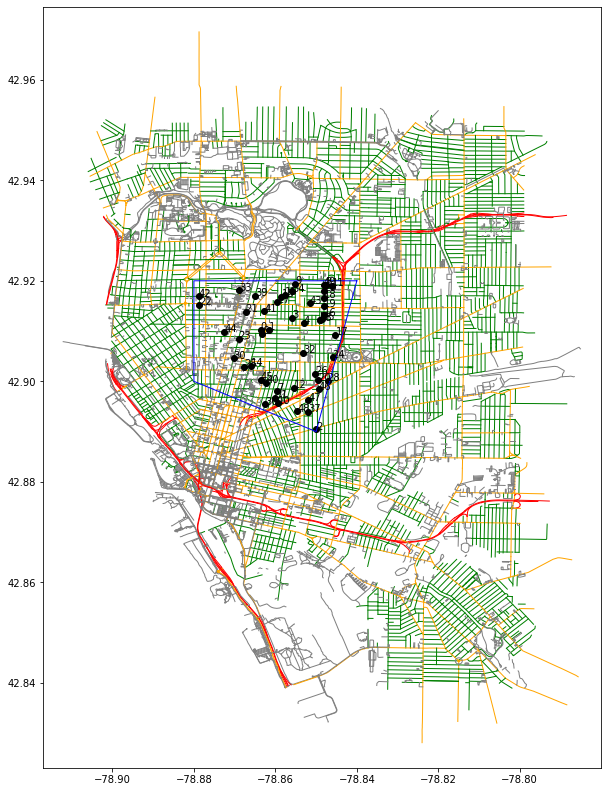

In [8]:
fig

#### 2.2 Inside a circle

In [10]:
centerLoc = [42.88, -78.84]
radius = 2000
customers = vrpSolver.rndPlainNodes(
    N = 50,
    distr = {
        'method': "roadNetworkCircleLatLon",
        'roadNetwork': network['road'],
        'centerLatLon': centerLoc,
        'radiusInMeters': radius
    })

D:\Zoo\Hummingbird\vrpSolver\vrpSolver\instance.py:195: UserWarning: WARNING: Set `roadClass` to be default as ['residential']
  warnings.warn("WARNING: Set `roadClass` to be default as ['residential']")


In [11]:
fig, ax = vrpSolver.plotRoadNetwork(
    roadNetwork = network,
    figSize = [10, 15]
)
# Plot the customer locations on map in black
fig, ax = vrpSolver.plotNodes(
    fig = fig,
    ax = ax,
    nodes = customers,
    color = 'black',
    xyReverseFlag = True)
fig
# Plot polygon
poly = []
for i in range(36):
    poly.append(vrpSolver.ptInDistLatLon(centerLoc, i * 10, radius))
fig, ax = vrpSolver.plotPolygon(
    fig = fig, 
    ax = ax,
    poly = poly,
    xyReverseFlag = True,
    edgeColor = 'blue')

In [12]:
vrpSolver.plotRoadNetwork?